## TODO

1. ~~Figure out how to deploy using kubectl~~

2. ~~Setup bash aliases~~

3. Fix training with auxiliary enabled

4. Perform NAS from scratch

5. Visualize Training with tensorboard





 

## Resources 

- [Pytorch Pipeline Example](https://www.kaggle.com/hasanmoni/pytorch-resnet34)  |  [Preprocessing Example](https://www.kaggle.com/kylewang1999/classify-blood-cell-subtypes-all-process/edit)

- [Cluster Startup Doc](https://docs.google.com/document/d/1DuYSFYcDwdT9L4Vc-8m5HHBC_pQB2FgWvtK_xZR8nEk/edit)  |  [UCSD-PRP Doc - Gitlab](https://gitlab.com/ucsd-prp/ucsd-prp.gitlab.io/-/tree/master/_userdocs) | [Nautilus Guide - Github](https://github.com/Adamdad/nautilus_cluster_guide)

## Bug Journal

1. When working locally with pathlib's list(Path.glob()), the path needs to be global path. Otherwise will produce empty list.

2. In utils, replace view() with reshape(). This is a pytorch version issue

3. In utils.load(): If using CPU, need to replace model.load_state_dict w/ torch.load()

4. [CUDA out of memory](https://pytorch.org/docs/stable/notes/faq.html) -- batch size too large

5. CUDA out of memory after changing batch size, while testing on colab - Loop thru test_queue inside of torch.no_grad()

6. In train(), infer(), change top 5 to top2, since there are only 4 clases to predict.

7. error: unrecognized arguments while running train.py with cluster/train.sh bash script. Quick fix: execute using .yaml file instead. 

8. Upon restart, import numpy in .py files result in ```ModuleNotFoundError: No module named 'numpy'```. [Stackoverflow](https://stackoverflow.com/a/40186317): 

> a) Make sure you are choosing the anaconda python interpreter
> b) Try ```conda install numpy``` if step 1 doesn't solve the problem 

9. Training with auxiliary enabled result in tensor size mismatch: ```mat1 and mat2 shapes cannot be multiplied (10x62208 and 768x4)```.
> See [this discussion](https://stackoverflow.com/a/66338440)
```
```


## I. **Packages & Libraries**

In [1]:
import os
import os.path
from pathlib import Path
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from PIL import Image

### Invoke train_custom.py

In [14]:
!python ./darts-LPT/train_custom_local.py --auxiliary 

Experiment dir : eval-EXP-20210714-094747
07/14 09:47:47 AM gpu device = 0
07/14 09:47:47 AM args = Namespace(arch='DARTS_CIFAR10_TS_1ST', auxiliary=False, auxiliary_weight=0.4, batch_size=10, cutout=False, cutout_length=16, data='../data', drop_path_prob=0.2, epochs=600, gpu=0, grad_clip=5, init_channels=36, is_cifar100=0, layers=20, learning_rate=0.025, model_path='saved_models', momentum=0.9, report_freq=50, resume='', save='eval-EXP-20210714-094747', seed=0, weight_decay=0.0003)
108 108 36
108 144 36
144 144 36
144 144 36
144 144 36
144 144 36
144 144 72
144 288 72
288 288 72
288 288 72
288 288 72
288 288 72
288 288 72
288 288 144
288 576 144
576 576 144
576 576 144
576 576 144
576 576 144
576 576 144
07/14 09:47:47 AM param size = 2.698744MB
/Users/KyleWang/Desktop/Blood_cell_classification_kaggle/kaggle/blood_cell/dataset2-master/dataset2-master/images/TRAIN
Class Counts - Train | Test | Validation
EOSINOPHIL:   2497 | 623 | 13
LYMPHOCYTE:   2483 | 620 | 6
MONOCYTE  :   2478 | 62

### Testing

In [15]:
# Weights trained using colab (less than 10 epoch)
!python ./darts-LPT/test_local.py --model_path ./eval-EXP-20210713-031828/weights.pt

/Users/KyleWang/Desktop/Blood_cell_classification_kaggle
07/14 09:47:59 AM args = Namespace(arch='DARTS_CIFAR10_TS_1ST', auxiliary=False, batch_size=10, cutout=False, cutout_length=16, data='../data', drop_path_prob=0.2, gpu=0, init_channels=36, layers=20, model_path='./eval-EXP-20210713-031828/weights.pt', report_freq=50, seed=0)
108 108 36
108 144 36
144 144 36
144 144 36
144 144 36
144 144 36
144 144 72
144 288 72
288 288 72
288 288 72
288 288 72
288 288 72
288 288 72
288 288 144
288 576 144
576 576 144
576 576 144
576 576 144
576 576 144
576 576 144
07/14 09:48:00 AM param size = 2.698744MB
/Users/KyleWang/Desktop/Blood_cell_classification_kaggle/kaggle/blood_cell/dataset2-master/dataset2-master/images/TRAIN
Class Counts - Train | Test | Validation
EOSINOPHIL:   2497 | 623 | 13
LYMPHOCYTE:   2483 | 620 | 6
MONOCYTE  :   2478 | 620 | 4
NEUTROPHIL:   2499 | 624 | 48
/Users/KyleWang/Desktop/Blood_cell_classification_kaggle/kaggle/blood_cell/dataset2-master/dataset2-master/images/TRAIN

### Set Paths

In [2]:
# dataset_path = "/content/drive/MyDrive/kaggle/blood_cell/" # Path for colab
dataset_path = "./kaggle/blood_cell/"
# Train/Test/Val Paths
Train_Data_Path = Path(dataset_path + "dataset2-master/dataset2-master/images/TRAIN")
Test_Data_Path = Path(dataset_path + "dataset2-master/dataset2-master/images/TEST")
Validation_Data_Path = Path(dataset_path + "dataset2-master/dataset2-master/images/TEST_SIMPLE")

# If working on local, get absolute paths. Comment it out for colab
Train_Data_Path = Train_Data_Path.resolve()
Test_Data_Path = Test_Data_Path.resolve()
Validation_Data_Path = Validation_Data_Path.resolve()

print(Train_Data_Path)

# JPG Paths
Train_JPG_Path = list(Train_Data_Path.glob(r"**/*.jpeg"))
Test_JPG_Path = list(Test_Data_Path.glob(r"**/*.jpeg"))
Validation_JPG_Path = list(Validation_Data_Path.glob(r"**/*.jpeg"))



CATEGORIES = ['EOSINOPHIL','LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

def get_category_id(path):
  category = os.path.split(os.path.split(path)[0])[1]
  return CATEGORIES.index(category)


# JPG Lables (Approx. 3000 imgs per type)
Train_JPG_Labels = list(map(get_category_id,Train_JPG_Path))
Test_JPG_Labels = list(map(get_category_id,Test_JPG_Path))
Validation_JPG_Labels = list(map(get_category_id,Validation_JPG_Path))

print("Class Counts - Train | Test | Validation")
print("EOSINOPHIL:   {} | {} | {}".format(Train_JPG_Labels.count(0), Test_JPG_Labels.count(0), Validation_JPG_Labels.count(0)))
print("LYMPHOCYTE:   {} | {} | {}".format(Train_JPG_Labels.count(1), Test_JPG_Labels.count(1), Validation_JPG_Labels.count(1)))
print("MONOCYTE  :   {} | {} | {}".format(Train_JPG_Labels.count(2), Test_JPG_Labels.count(2), Validation_JPG_Labels.count(2)))
print("NEUTROPHIL:   {} | {} | {}".format(Train_JPG_Labels.count(3), Test_JPG_Labels.count(3), Validation_JPG_Labels.count(3)))


/Users/KyleWang/Desktop/Blood_cell_classification_kaggle/kaggle/blood_cell/dataset2-master/dataset2-master/images/TRAIN
Class Counts - Train | Test | Validation
EOSINOPHIL:   2497 | 623 | 13
LYMPHOCYTE:   2483 | 620 | 6
MONOCYTE  :   2478 | 620 | 4
NEUTROPHIL:   2499 | 624 | 48


### Convert Paths from List to [Series](https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-pandas-series-and-python-lists/27373/2) Structure 

In [5]:
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels,name="CATEGORY")

Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="CATEGORY")

Validation_JPG_Path_Series = pd.Series(Validation_JPG_Path,name="JPG").astype(str)
Validation_JPG_Labels_Series = pd.Series(Validation_JPG_Labels,name="CATEGORY")

## III. **Data Parsing & Preprocessing**

### **Create dataframes and shuffling**

[Pandas shuffling documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

### Visualization

(240, 320, 3)


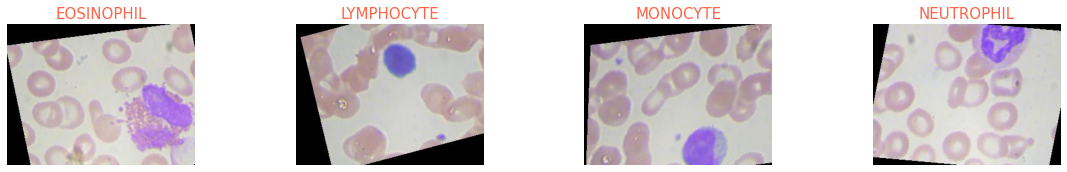

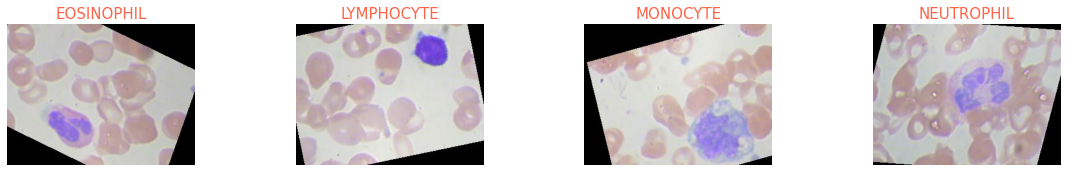

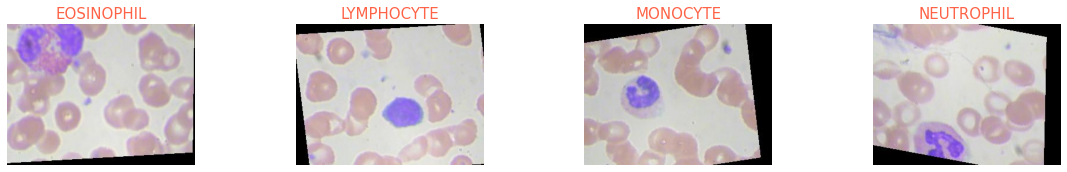

In [8]:
import cv2
import seaborn as sns
CATEGORIES    = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']

# Show first 3 set of images
for k in range(3):
    i=0
    plt.figure(figsize=(25,15))
    for category in CATEGORIES:
        plt.subplot(5, 5, i+1)
        plt.yticks([])
        plt.xticks([])
        path=str(Train_Data_Path) + '/' + category
        image_p=os.listdir(path)
        plt.title(category , color='tomato').set_size(15)
        plt.axis('off')
        image = cv2.imread(os.path.join(path, image_p[k])) 
        image = image[:, :, [2, 1, 0]] 
        plt.imshow(image)
        i+=1
print(image.shape) # Show image resolution

Text(0.5, 1.0, 'Validation set')

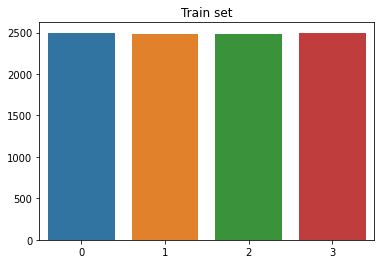

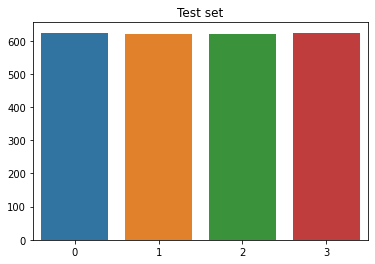

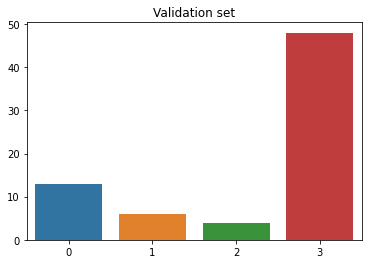

In [9]:
# Visualize category counts for train/test/valid set
count = Main_Train_Data.CATEGORY.value_counts()
sns.barplot(x=count.index, y=count.values).set_title('Train set')
plt.figure()
count = Main_Test_Data.CATEGORY.value_counts()
sns.barplot(x=count.index, y=count.values).set_title('Test set')
plt.figure()
count = Main_Validation_Data.CATEGORY.value_counts()
sns.barplot(x=count.index, y=count.values).set_title('Validation set')

### Preprocessing


In [9]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import albumentations

x_train = Main_Train_Data.JPG
x_valid = Main_Validation_Data.JPG
y_train = Main_Train_Data.CATEGORY
y_valid = Main_Validation_Data.CATEGORY

CATEGORIES = ['EOSINOPHIL','LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


class Custom_Dataset:
    def __init__(self, images, targets, train_data=False):
        self.features = images
        self.targets = targets
        MEAN = [0.485, 0.456, 0.406]
        STD = [0.229, 0.224, 0.225]

        # Augment train, valid images
        if train_data:
          # self.transform = transforms.Compose([
          #   transforms.RandomCrop(128, padding=4),
          #   transforms.RandomHorizontalFlip(),
          #   transforms.ToTensor(),
          #   transforms.Normalize(MEAN, STD),
          # ])
          self.transform = albumentations.Compose([
              albumentations.Resize(128, 128, always_apply=True),
              albumentations.ShiftScaleRotate(shift_limit=0.0625,
                                              scale_limit=0.1,
                                              rotate_limit=5,
                                              p=0.9),
              albumentations.RandomRotate90(always_apply=False),
              albumentations.HorizontalFlip(),
              albumentations.VerticalFlip(),
              albumentations.Normalize(mean=(0.485, 0.456, 0.406), 
                                        std=(0.229, 0.224, 0.225), 
                                        always_apply=True)              
              ])

        else:
          # self.transform = transforms.Compose([
          #   transforms.ToTensor(),
          #   transforms.Normalize(MEAN, STD),
          # ])
          self.transform = albumentations.Compose([
              albumentations.Resize(128, 128, always_apply=True),
              albumentations.Normalize(mean=(0.485, 0.456, 0.406), 
                                        std=(0.229, 0.224, 0.225),
                                        always_apply=True) 
              ])
                    
    def __len__(self):
        return len(self.targets) 
    
    def __getitem__(self, idx):
        image = self.features[idx]
        image = cv2.imread(image)
        image = cv2.resize(image, (128,128)).astype(float)
        image = self.transform(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float) 

        return {
            'image': torch.tensor(image, dtype=torch.float),
            'label': torch.tensor(self.targets[idx], dtype=torch.long)
        }

train_feature_lable = Custom_Dataset(x_train.values, y_train.values, train_data=True)
valid_feature_lable = Custom_Dataset(x_valid.values, y_valid.values, train_data=False)
                                     
BATCH_SIZE = 10
train_loader = DataLoader(
      dataset = train_feature_lable,
      batch_size = BATCH_SIZE,
      shuffle = True,
      num_workers = 4
      )
valid_loader = DataLoader(
      dataset = valid_feature_lable,
      batch_size = BATCH_SIZE,
      shuffle = False,
      num_workers = 4
      )

## IV. **Model & Training**

### Change Dir

In [16]:
# Change into LPT directory
darts_LPT_path = "/content/drive/MyDrive/LPT-Code/darts-LPT"
os.chdir(darts_LPT_path)
!ls

architect.py		  model_search.py
architect_ts.py		  operations.py
eval-EXP-20210711-152809  plot_ablation.py
eval-EXP-20210711-152857  __pycache__
eval-EXP-20210711-154108  search-EXP-20210623-175100
eval-EXP-20210711-154409  search-EXP-20210623-175137
eval-EXP-20210711-154427  search-EXP-20210623-175153
eval-EXP-20210711-154907  teacher.py
eval-EXP-20210711-154936  teacher_update_ab4.py
eval-EXP-20210711-155200  teacher_update.py
eval-EXP-20210711-155327  test_imagenet.py
eval-EXP-20210711-155505  test.py
eval-EXP-20210711-160500  train.py
eval-EXP-20210711-160640  train_search.py
eval-EXP-20210711-162615  train_search_ts_ab1.py
eval-EXP-20210711-164842  train_search_ts_ab4.py
eval-EXP-20210711-222736  train_search_ts.py
eval-EXP-20210711-223116  utils.py
genotypes.py		  visualize.py
model.py


### Training